<a href="https://colab.research.google.com/github/cheng0908/DataMining/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
ir_df = sns.load_dataset('iris')
ir_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


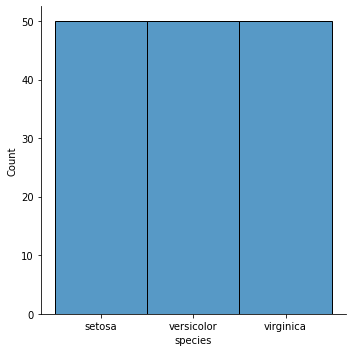

In [ ]:
sns.displot(ir_df['species'])

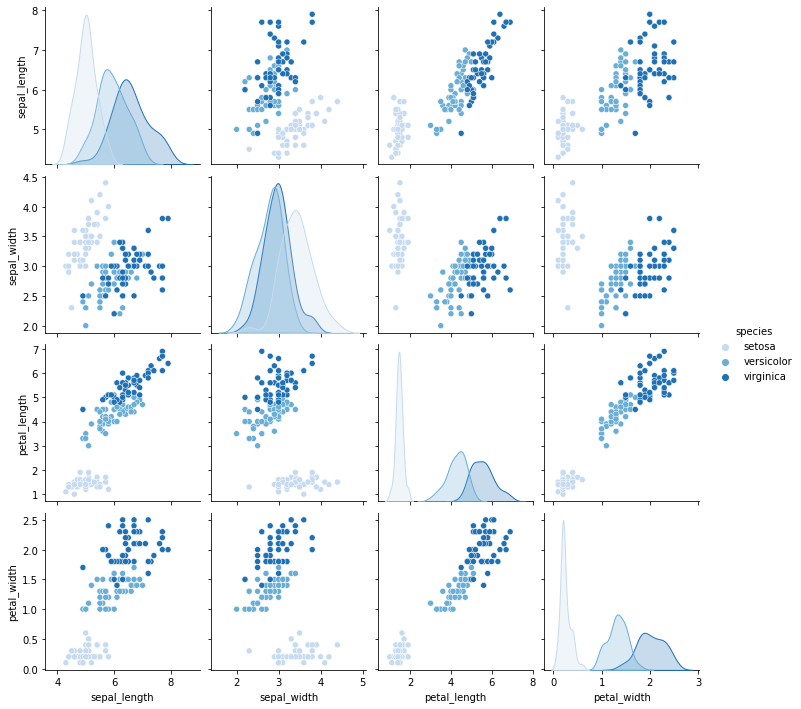

In [ ]:
sns.pairplot(ir_df, hue='species', palette='Blues')

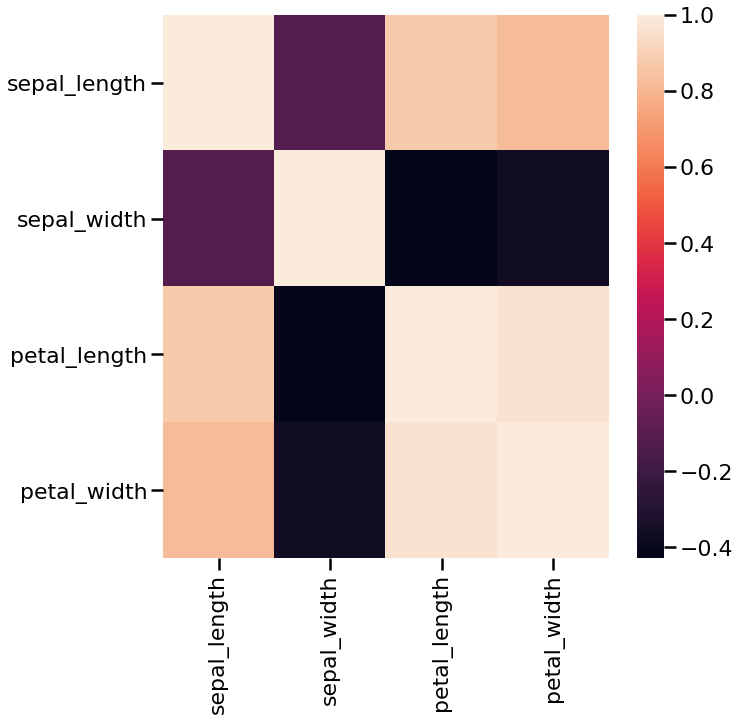

In [ ]:
cor = ir_df.corr()
plt.figure(figsize=(10,10))
sns.set_context(context='poster', font_scale=1)
sns.heatmap(cor)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
import pydotplus
from IPython.display import Image

In [ ]:
le = LabelEncoder()
ir_df['species'] = le.fit_transform(ir_df['species'])

In [ ]:
print(ir_df.head())
ir_df.info()

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = ir_df.drop(['species'], axis=1)
y = ir_df.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
list = [x_train, y_train, x_test, y_test]
print(list)

[     sepal_length  sepal_width  petal_length  petal_width
91            6.1          3.0           4.6          1.4
135           7.7          3.0           6.1          2.3
69            5.6          2.5           3.9          1.1
128           6.4          2.8           5.6          2.1
114           5.8          2.8           5.1          2.4
..            ...          ...           ...          ...
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
72            6.3          2.5           4.9          1.5
140           6.7          3.1           5.6          2.4
37            4.9          3.6           1.4          0.1

[120 rows x 4 columns], 91     1
135    2
69     1
128    2
114    2
      ..
133    2
137    2
72     1
140    2
37     0
Name: species, Length: 120, dtype: int64,      sepal_length  sepal_width  petal_length  petal_width
14            5.8          4.0           1.2          0.2
98            5.1    

In [ ]:
#Decision Tree
dt = tree.DecisionTreeClassifier()

In [ ]:
print(type(y_train))
print(type(x_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Decision Tree:
Train set accuracy: 1.0
Test set accuracy: 0.9666666666666667
The confusion metrix of tranning set
 [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]
The confusion metrix of testing set
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



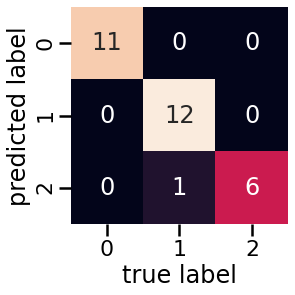

In [ ]:
dt.fit(x_train, y_train)
print('Decision Tree:')
print('Train set accuracy:', dt.score(x_train, y_train))
print('Test set accuracy:', dt.score(x_test, y_test))

cnf = confusion_matrix(y_train, dt.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, dt.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, dt.predict(x_test)))

[Text(133.92000000000002, 199.32, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(100.44000000000001, 90.6, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8400000000000

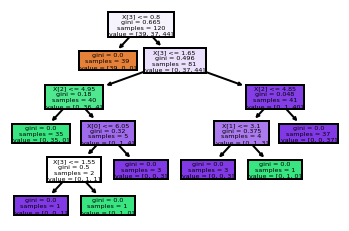

In [ ]:
tree.plot_tree(dt, filled= True)

In [ ]:
pip install info_gain

In [ ]:
from info_gain import info_gain

In [ ]:
ig = info_gain.info_gain(ir_df.sepal_length, ir_df.species)
igr = info_gain.info_gain_ratio(ir_df.sepal_length, ir_df.species)

print('Info Gain of sepal length: ', ig)
print('Info Gain Ratio of sepal length: ', igr)

Info Gain of sepal length:  0.6078468394475829
Info Gain Ratio of sepal length:  0.38350865662185274


In [ ]:
ig = info_gain.info_gain(ir_df.sepal_width, ir_df.species)
igr = info_gain.info_gain_ratio(ir_df.sepal_width, ir_df.species)

print('Info Gain of sepal width: ', ig)
print('Info Gain Ratio of sepal width: ', igr)

Info Gain of sepal width:  0.35810955263431943
Info Gain Ratio of sepal width:  0.22594197179515604


In [ ]:
ig = info_gain.info_gain(ir_df.petal_length, ir_df.species)
igr = info_gain.info_gain_ratio(ir_df.petal_length, ir_df.species)

print('Info Gain of petal_length: ', ig)
print('Info Gain Ratio of petal_length: ', igr)

Info Gain of petal_length:  1.002510220562347
Info Gain Ratio of petal_length:  0.6325135264122691


In [ ]:
ig = info_gain.info_gain(ir_df.petal_width, ir_df.species)
igr = info_gain.info_gain_ratio(ir_df.petal_width, ir_df.species)

print('Info Gain of petal_width: ', ig)
print('Info Gain Ratio of petal_width: ', igr)

Info Gain of petal_width:  0.9952885384500014
Info Gain Ratio of petal_width:  0.6279571522967555


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

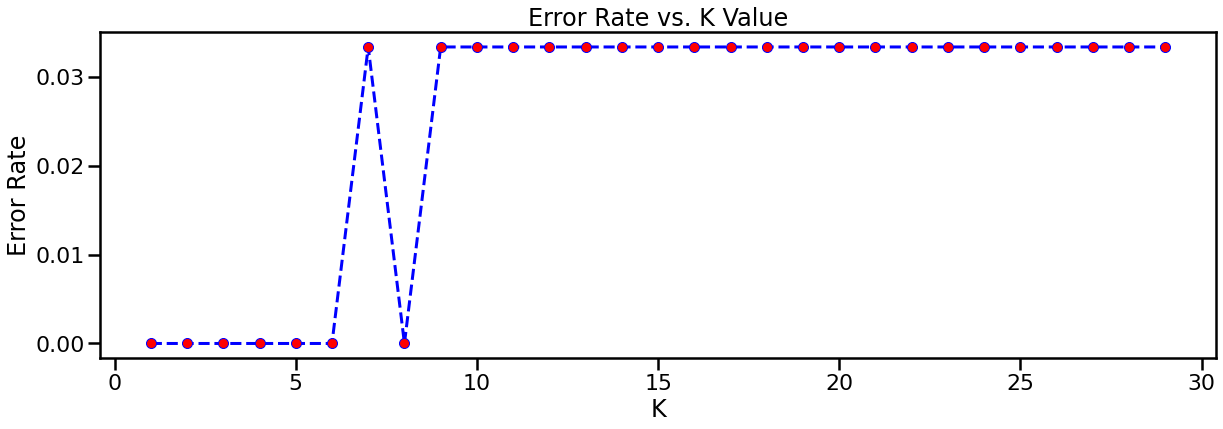

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 1)
error_rate = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(20,6))
plt.plot(range(1,30),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")

plt.ylabel("Error Rate")

Knn:
Train set accuracy: 0.95
Test set accuracy: 0.9666666666666667
The confusion metrix of tranning set
 [[39  0  0]
 [ 0 33  4]
 [ 0  2 42]]
The confusion metrix of testing set
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



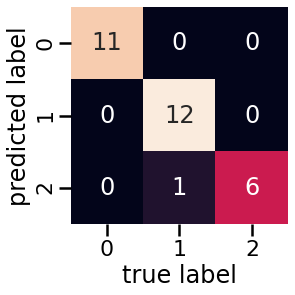

In [ ]:
print('Knn:')
print('Train set accuracy:', knn.score(x_train, y_train))
print('Test set accuracy:', knn.score(x_test, y_test))

cnf = confusion_matrix(y_train, knn.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, knn.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, knn.predict(x_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB

GaussianNB:
Train set accuracy: 0.95
Test set accuracy: 0.9666666666666667
The confusion metrix of tranning set
 [[39  0  0]
 [ 0 34  3]
 [ 0  3 41]]
The confusion metrix of testing set
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



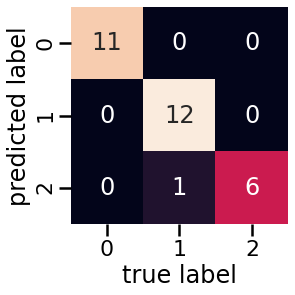

In [ ]:
g_nb = GaussianNB(priors=None)
g_nb_fit = g_nb.fit(x_train, y_train)

print('GaussianNB:')
print('Train set accuracy:', g_nb.score(x_train, y_train))
print('Test set accuracy:', g_nb.score(x_test, y_test))

cnf = confusion_matrix(y_train, g_nb.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, g_nb.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, g_nb.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, knn.predict(x_test)))

In [ ]:
accuracy_results={}
g_nb = GaussianNB(priors = None)

for i in np.arange(0.1,0.9,0.01):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=1)
  g_nb_fit = g_nb.fit(x_train, y_train)
  accuracy_score = g_nb_fit.score(x_test,y_test)
  accuracy_results[i] = accuracy_score

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
for b, a in enumerate(accuracy_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f\n" %(index, name, score))

1) 0.1 = 1.000000

2) 0.11 = 1.000000

3) 0.12 = 1.000000

4) 0.13 = 1.000000

5) 0.13999999999999999 = 1.000000

6) 0.5599999999999997 = 0.976190

7) 0.5499999999999998 = 0.975904

8) 0.5399999999999998 = 0.975309

9) 0.5299999999999998 = 0.975000

10) 0.5199999999999998 = 0.974359

11) 0.24999999999999992 = 0.973684

12) 0.6899999999999997 = 0.971154

13) 0.6799999999999997 = 0.970588

14) 0.6699999999999997 = 0.970297

15) 0.6599999999999997 = 0.969697

16) 0.6499999999999997 = 0.969388

17) 0.6399999999999997 = 0.968750

18) 0.6299999999999997 = 0.968421

19) 0.6199999999999998 = 0.967742

20) 0.6099999999999998 = 0.967391

21) 0.19999999999999996 = 0.966667

22) 0.5999999999999998 = 0.966667

23) 0.5899999999999997 = 0.966292

24) 0.18999999999999995 = 0.965517

25) 0.5799999999999997 = 0.965517

26) 0.5699999999999997 = 0.965116

27) 0.7499999999999997 = 0.964602

28) 0.7399999999999997 = 0.963964

29) 0.7299999999999996 = 0.963636

30) 0.17999999999999997 = 0.962963

31) 0.71999

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)

for i in np.arange(0.1,0.9,0.01):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=1)
  rfc_fit = rfc.fit(x_train, y_train)
  accuracy_score = rfc_fit.score(x_test,y_test)
  accuracy_results[i] = accuracy_score

accuracy_results_sorted = sorted(accuracy_results.items(),key= lambda item:item[1], reverse= True)
for b, a in enumerate(accuracy_results_sorted):
  index = b+1
  name = a[0]
  score = a[1]
  print("%d) %s = %f\n" %(index, name, score))

1) 0.1 = 1.000000

2) 0.11 = 1.000000

3) 0.12 = 1.000000

4) 0.13 = 1.000000

5) 0.13999999999999999 = 1.000000

6) 0.2799999999999999 = 0.976190

7) 0.2699999999999999 = 0.975610

8) 0.5299999999999998 = 0.975000

9) 0.2599999999999999 = 0.974359

10) 0.5199999999999998 = 0.974359

11) 0.24999999999999992 = 0.973684

12) 0.23999999999999994 = 0.972222

13) 0.47999999999999976 = 0.972222

14) 0.7099999999999996 = 0.971963

15) 0.46999999999999986 = 0.971831

16) 0.22999999999999995 = 0.971429

17) 0.45999999999999985 = 0.971014

18) 0.44999999999999984 = 0.970588

19) 0.21999999999999995 = 0.969697

20) 0.6599999999999997 = 0.969697

21) 0.4299999999999998 = 0.969231

22) 0.20999999999999996 = 0.968750

23) 0.4199999999999998 = 0.968254

24) 0.4099999999999998 = 0.967742

25) 0.19999999999999996 = 0.966667

26) 0.3999999999999998 = 0.966667

27) 0.3899999999999999 = 0.966102

28) 0.18999999999999995 = 0.965517

29) 0.3699999999999999 = 0.964286

30) 0.17999999999999997 = 0.962963

31)

RandomForest:
Train set accuracy: 0.9923076923076923
Test set accuracy: 1.0
The confusion metrix of tranning set
 [[42  0  0]
 [ 0 42  0]
 [ 0  1 45]]
The confusion metrix of testing set
 [[8 0 0]
 [0 8 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



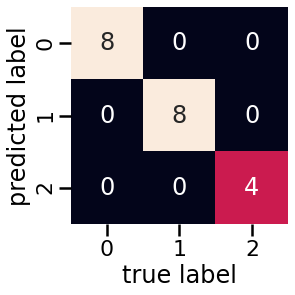

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.13, random_state=1)
rfc_fit = rfc.fit(x_train, y_train)

print('RandomForest:')
print('Train set accuracy:', rfc_fit.score(x_train, y_train))
print('Test set accuracy:', rfc_fit.score(x_test, y_test))

cnf = confusion_matrix(y_train, rfc_fit.predict(x_train))
print('The confusion metrix of tranning set\n', cnf)
cnf=confusion_matrix(y_test, rfc_fit.predict(x_test))
print('The confusion metrix of testing set\n', cnf)

mat = confusion_matrix(y_test, rfc_fit.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, rfc_fit.predict(x_test)))

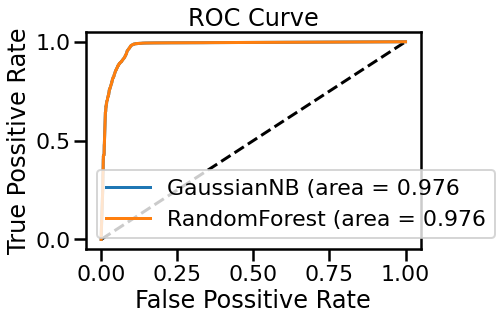

In [ ]:
from sklearn.datasets import make_classification
a,b = make_classification(80000)
X_train, X_test, Y_train, Y_test = train_test_split(a,b, test_size= 0.5)
X_train, X_test_lr, Y_train, Y_test_lr = train_test_split(X_train,Y_train, test_size= 0.5)

#random forest
rf = RandomForestClassifier(max_depth= 3, n_estimators=10)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

#GaussianNB
gnb = GaussianNB(priors=None)
gnb.fit(X_train, Y_train)
y_pred_gnb = rf.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, y_pred_gnb)
auc_gnb = auc(fpr_gnb, tpr_gnb)

#Plot Graph
plt.figure(1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_gnb, tpr_gnb, label='GaussianNB (area = {:.3f}'.format(auc_gnb))
plt.plot(fpr_rf, tpr_rf, label='RandomForest (area = {:.3f}'.format(auc_rf))
plt.xlabel('False Possitive Rate')
plt.ylabel('True Possitive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import cluster, metrics
from scipy.cluster.hierarchy import dendrogram

In [ ]:
iris_X = ir_df.drop(['species'], axis=1)
iris_X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#K-mean
kmeans_fit = cluster.KMeans(n_clusters= 3).fit(iris_X)

cluster_labels = kmeans_fit.labels_

In [ ]:
print("分群結果")
print(cluster_labels)


iris_Y = ir_df['species']
print("真實品種：")
print(iris_Y)

分群結果
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
真實品種：
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [ ]:
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5528190123564102


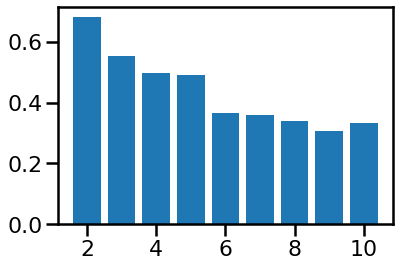

[0.6810461692117465, 0.5528190123564102, 0.49805050499728815, 0.4899721166909478, 0.3664804028900843, 0.35882944509656944, 0.34065171021763, 0.30730872671131426, 0.33266998373223483]


In [ ]:
#how to chooose k value
silhouette_avgs = []
ks = range(2,11)
for k in ks:
  kmeans_fit = cluster.KMeans(n_clusters= k).fit(iris_X)
  cluster_labels = kmeans_fit.labels_
  silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
  silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [ ]:
#Hierarchical Clustering
hclust = cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hclust.fit(iris_X)
cluster_labels = hclust.labels_
print(cluster_labels)

print(iris_Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [ ]:
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5543236611296426


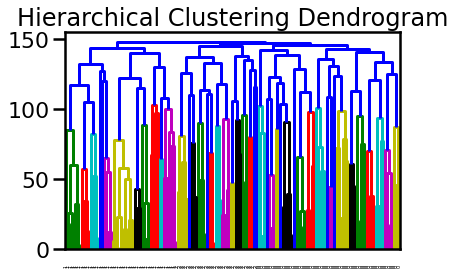

<Figure size 1440x720 with 0 Axes>

In [ ]:
def plot_dendrogram(model, **kwargs):
  children = model.children_
  distance = np.arange(children.shape[0])
  no_of_observations = np.arange(2, children.shape[0]+2)
  linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
  dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hclust, labels=hclust.labels_)
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import Normalizer


x = np.array([1, 2, 3, 4], dtype='float32').reshape(1,-1)

print("Before normalization: ", x)

options = ['l1', 'l2', 'max']
for opt in options:
    norm_x = Normalizer(norm=opt).fit_transform(x)
    print("After %s normalization: " % opt.capitalize(), norm_x)

Before normalization:  [[1. 2. 3. 4.]]
After L1 normalization:  [[0.1 0.2 0.3 0.4]]
After L2 normalization:  [[0.18257418 0.36514837 0.5477225  0.73029673]]
After Max normalization:  [[0.25 0.5  0.75 1.  ]]


In [ ]:
import numpy as np
from sklearn.preprocessing import normalize


x = np.array([1, 2, 3, 4], dtype='float32').reshape(1,-1)

print("Before normalization: ", x)

options = ['l1', 'l2', 'max']
for opt in options:
    norm_x = normalize(x, norm=opt)
    print("After %s normalization: " % opt.capitalize(), norm_x)

Before normalization:  [[1. 2. 3. 4.]]
After L1 normalization:  [[0.1 0.2 0.3 0.4]]
After L2 normalization:  [[0.18257418 0.36514837 0.5477225  0.73029673]]
After Max normalization:  [[0.25 0.5  0.75 1.  ]]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(X) 

print(X,'\n')
print(scaled_data)

[[0 0]
 [1 0]
 [0 1]
 [1 1]] 

[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
 
data = load_iris()
scale= StandardScaler()
 
# separate the independent and dependent variables
X_data = data.data
target = data.target

print(X_data)
 
# standardization of dependent variables
scaled_data = scale.fit_transform(X_data) 
print(scaled_data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
from scipy.stats import zscore
data = load_iris()
scale= StandardScaler()
 
# separate the independent and dependent variables
X_data = data.data
target = data.target

print(X_data)
 
# standardization of dependent variables
scaled_data = zscore(X_data)
print(scaled_data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.